# SI 618 - Lab 2: Pandas I: DataFrames and Data Manipulation

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas before you leave the class.

### Name:  YOUR NAME GOES HERE
### Uniqname: YOUR UNIQNAME GOES HERE
### People you worked with: [if you didn't work with anyone else write "I worked by myself" here].

## Objectives:
* Know how to manipulate Series and DataFrame
* Draw a random sample of data
* Handle missing values by filtering out or filling in blanks with values
* Select subset of data using boolean masking
* Compute descriptive and summary statistics
* Discretize continuous variables
* Sort Series/DataFrame by index or column
* Group data and calculate aggregate statistics
* Use vectorized string methods
* Make basic plots (scatter plot, histogram, bar chart, etc)

 

## Note: If you get stuck, ask for help or try to move onto the next question.

## Preface
This lab consists of two parts. Part 1 is based on a mental health survey and Part 2 uses movies and cast data.  They are designed to get you familiarized with data manipulation using pandas.

# Part 1: Mental Health Disorders In the Tech Workplace

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.  The dataset was obtained from Kaggle: https://www.kaggle.com/osmi/mental-health-in-tech-survey.

## Metadata

Here's a description of the fields available in this dataset.

| Field | Description |
| --- | --- |
| Timestamp | |
| Age | |
| Gender | |
| Country | |
| state | If you live in the United States, which state or territory do you live in? |
| self_employed | Are you self-employed? |
| family_history | Do you have a family history of mental illness? |
| treatment | Have you sought treatment for a mental health condition? |
| work_interfere | If you have a mental health condition, do you feel that it interferes with your work? |
| no_employees | How many employees does your company or organization have? |
| remote_work | Do you work remotely (outside of an office) at least 50% of the time? |
| tech_company | Is your employer primarily a tech company/organization? |
| benefits | Does your employer provide mental health benefits? |
| care_options | Do you know the options for mental health care your employer provides? |
| wellness_program | Has your employer ever discussed mental health as part of an employee wellness program? |
| seek_help | Does your employer provide resources to learn more about mental health issues and how to seek help? |
| anonymity | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? |
| leave | How easy is it for you to take medical leave for a mental health condition? |
| mental_health_consequence | Do you think that discussing a mental health issue with your employer would have negative consequences? |
| phys_health_consequence | Do you think that discussing a physical health issue with your employer would have negative consequences? |
| coworkers | Would you be willing to discuss a mental health issue with your coworkers? |
| supervisor | Would you be willing to discuss a mental health issue with your direct supervisor(s)? |
| mental_health_interview | Would you bring up a mental health issue with a potential employer in an interview? |
| phys_health_interview | Would you bring up a physical health issue with a potential employer in an interview? |
| mental_vs_physical | Do you feel that your employer takes mental health as seriously as physical health? |
| obs_consequence | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |
| comments | Any additional notes or comments |


## Getting started

#### First, let's import the NumPy and pandas libraries, and get ready to do some plotting:

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

#### Now let's load the mental health survey data.  You'll be using ```pd.read_csv(...)``` a lot.

In [37]:
df = pd.read_csv("survey.csv")

#### Taking a random sample is easy in pandas:

In [27]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
275,2014-08-27 14:01:25,33,Male,Canada,NaN,No,No,No,NaN,100-500,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1105,2014-08-30 00:09:55,25,Male,United States,SC,No,No,Yes,Rarely,6-25,...,Somewhat easy,Maybe,No,No,Some of them,No,Maybe,Don't know,No,NaN
758,2014-08-28 11:32:37,34,male,Germany,NaN,No,No,No,Rarely,26-100,...,Somewhat easy,Maybe,Maybe,No,Some of them,Maybe,Maybe,Yes,No,NaN
222,2014-08-27 13:14:53,28,male,United States,PA,No,No,No,Rarely,6-25,...,Don't know,No,No,Some of them,Some of them,No,Maybe,Don't know,No,NaN
398,2014-08-27 15:25:41,32,female,United States,AL,No,No,No,Never,100-500,...,Don't know,Maybe,No,No,Some of them,No,Maybe,Don't know,No,NaN


#### Finally, as part of loading data, it's helpful to get an idea of the shape of the data:

In [5]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


## Filtering with Boolean Masking

The key to understanding boolean masking is that a statement like
``` df['Age'] > 30 ``` returns a boolean array (i.e. a list of True or False values).  That _mask_ can then be applied to the original array (Series) to yield only those values whose corresponding _mask_ value is True.

For example, if you wanted to find the people who answered 'Yes' to the 'Do you have a family history of mental illness?', you would get a boolean mask with:

In [6]:
family_history_mask = df.family_history == 'Yes'
# show the result
family_history_mask

0       False
1       False
2       False
3        True
4       False
5        True
6        True
7       False
8        True
9       False
10      False
11      False
12       True
13       True
14      False
15       True
16      False
17      False
18       True
19       True
20       True
21      False
22      False
23      False
24       True
25       True
26      False
27       True
28      False
29      False
        ...  
1229    False
1230     True
1231    False
1232     True
1233    False
1234    False
1235    False
1236    False
1237    False
1238     True
1239    False
1240     True
1241    False
1242    False
1243     True
1244    False
1245     True
1246    False
1247    False
1248     True
1249     True
1250     True
1251     True
1252     True
1253     True
1254    False
1255     True
1256     True
1257    False
1258     True
Name: family_history, Length: 1259, dtype: bool

You could then take that mask and apply it to the original DataFrame:

In [8]:
df_family_history = df[family_history_mask]
# show the result
df_family_history

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
13,2014-08-27 11:33:26,36,Male,United States,CT,NaN,Yes,No,Never,500-1000,...,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
19,2014-08-27 11:35:08,36,Male,France,NaN,Yes,Yes,No,NaN,6-25,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
20,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,NaN


It's often useful to count the number of rows in the resulting DataFrame:

In [9]:
print(len(df_family_history))

492


And it's nice to print it with some context (read the ```string.format(...)``` docs for more info):

In [20]:
print("There are {0:d} rows in the results, which represent {1:.0%} of the total.".format(
    len(df_family_history), len(df_family_history)/len(df)))

There are 492 rows in the results, which represent 39% of the total.


It's common practice to use a single line for a mask statement, so instead of:
```
family_history_mask = df.family_history == 'Yes'
df_family_history = df[family_history_mask]
```
it's more common to see
```
df_family_history = df[df.family_history == 'Yes']
```

### <font color="magenta">Q1a: How many people are willing to discuss a mental health issue with their supervisor?

In [21]:
# Put your code here

### <font color="magenta">Q1b: How many people are willing to discuss a mental health issue with their supervisor AND are seeking treatment (Hint: use the ```&``` operator)?

In [14]:
# Put your code here

### <font color="magenta">Q1c: Make a new DataFrame df_millenials with only millennials (born between 1976 and 1996).  </font>

In [1]:
# Put your code here

#### We will still use df for the following analyses.

## Descriptive and Summary Statistics

pandas provides a number of built-in statistical functions such as mean, median, min, max, variance and standard deviation.  For a full list see p. 139 in McKinney.  For example, to caculate the mean age in the survey, you can use:

In [ ]:
df['Age'].mean()

But wait... that doesn't look right.  Take a look at the minimum and maximum values of Age in the original data.

### <font color="magenta">Q2: What are the minimum and maximum ages in the survey sample?  </font>

In [33]:
# Put your code here

Hmmmmmm... ok, let's filter the original DataFrame (re-assigning the results to ```df```)

### <font color="magenta">Q3: Filter the df DataFrame to include only those rows with _reasonable_ values.</font>

In [35]:
df = None # Replace 'None' with your code to filter for reasonable ages

#### N.B. We'll be using the filtered version (i.e. the one with reasonable Age values) for the rest of the lab.

Usually, though, we just want to look at all the descriptive stats for a DataFrame.  Use ```.describe()``` to do so:

In [50]:
df["Age"].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

## Unique Values, Counts, Membership

Often, we want to find out what the different possible values are for a particular field.  For example, if we wanted to know the possible values of ```country```, we could use ```.unique()```:

In [48]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

Similarly, we sometimes want to count the number of times each value occurs.  Use ```value_counts()```

In [49]:
df.Country.value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Italy                       7
Sweden                      7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Greece                      2
Denmark                     2
Croatia                     2
Portugal                    2
Colombia                    2
Latvia                      1
Costa Rica                  1
China                       1
Romania                     1
Uruguay   

Notice that the results are sorted by descending freqency by default.  That's handy because we're often interested in only the top _n_ values, so we can do things like:

In [88]:
df.Country.value_counts().head(5)

United States     747
United Kingdom    184
Canada             72
Germany            45
Ireland            27
Name: Country, dtype: int64

Finally, it's sometimes useful to test for the existence of a certain condition.  For example, to determine if there are any respondents from Norway or Sweden you could use:

In [89]:
df.Country.isin(['Norway','Sweden']).any()

True

### <font color="magenta">Q4a: What are the possible values of ```no_employees```? </font>

In [ ]:
# Put your code here

### <font color="magenta">Q4b: How many respondents are in each category of ```no_employees```? </font>

In [ ]:
# Put your code here

## Indexing and Selecting Data

Sometimes we don't want to know what the value of a statistic (e.g. the max) is, but rather the label (i.e. index) associated with that.  These functions usually start with ```idx```. For example, if we want to know what country and state does the oldest person came from we could use ```idxmax()```:

In [90]:
print(df["Age"].idxmax())
print('---') # Print a separator to make the output clearer
print(df.iloc[df["Age"].idxmax()])
print('---') # Print a separator to make the output clearer
print(df.iloc[df["Age"].idxmax()][['Country','state']])

1182
---
Timestamp                    2014-12-15 00:43:49
Age                                           40
Gender                                      Male
Country                            United States
state                                         AL
self_employed                                 No
family_history                               Yes
treatment                                    Yes
work_interfere                         Sometimes
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                                 Yes
wellness_program                              No
seek_help                                     No
anonymity                                    Yes
leave                                 Don't know
mental_health_consequence                  Maybe
phys_health_consequence                       No
coworkers  

## Basic Plotting

We'll get into more complex visualizations next week, as well as a bit later in the course, but it's useful to take a look a few examples of simple charts.  For example, we might want to look at the proportion (%) of people receiving health benefits from their employers.  We can use the ```normalize=True``` parameter with value_counts() and then call ```.plot(kind="bar")``` to get a simple bar chart:

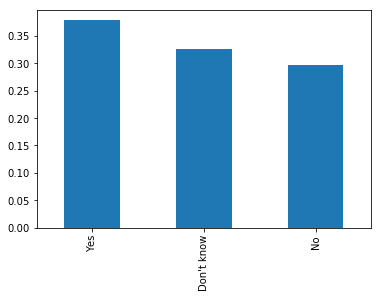

In [91]:
df.benefits.value_counts(normalize=True).plot(kind="bar")

### <font color="magenta">Q5: Create a bar chart of the ```no_employees``` field </font>

In [64]:
# Put your code here

Similarly, you can create a histogram of a continuous variable.  pandas (actually matplotlib) helps you out by allowing you to specify the number of 'bins'.  For example, here's a bar chart of Age with 10 bins:

In [92]:
df = df[(df.Age > 10) & (df.Age < 105)]

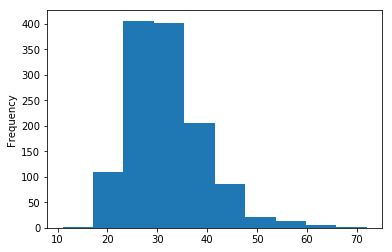

In [93]:
df.Age.plot(kind="hist",bins=10)

### <font color="magenta">Q6: Create a histogram of  ```Age``` with 20 bins.</font>

In [71]:
# Put your code here

## Discretization and Binning
Discretization of continuous variables can potentially enhance the goodness-of-fit of a statistical model. Age, for example, is a common varaible to be categorized.  There are two approaches to this:  (1) specify the number of quantiles you want or (2) specify the cutpoints.  For example, to cut the survey data into Age quartiles you could use:

In [94]:
df['Age_group'] = pd.qcut(df['Age'], 4) # or pd.qcut(df['Age'], [0, 0.25, 0.5, 0.75, 1.])

Alternatively, you could specify the cutpoints explicitly. For example:

In [95]:
df['Age_group'] = pd.cut(df.Age, [21,25,30,35,40,50,60])

### <font color="magenta">Q7: How many respondents are in their 20s, 30s, 40s, 50s, and 60+?  Hint: use value_counts() on ```Age_group``` (or whatever you decide to call the field:</font>

In [78]:
# Put your code here

## Handling Missing Values

We'll deal with missing values in more detail next week, but for now we should review the ```.isnull()``` and ```.fillna()``` functions.  We might, for example, want to find now many missing values there are for ```state```: 

In [96]:
sum(df.state.isnull())

0

and we might want to replace them with other values:

In [97]:
df.state = df.state.fillna("N/A")

### <font color="magenta">Q8a: How many self-employed responses are missing? </font>

In [ ]:
# Put your code here

### <font color="magenta">Q8b: Replace missing self-employed responses with the string 'Unknown'.</font>

In [65]:
# Put your code here

## Aggregation

Aggregation is a powerful feature and something that we'll be doing throughout the course.  pandas supports a variety of aggregation methods, one of which is ```.groupby(...)```.  For example, to find the median age of repondents in each state:

In [98]:
df.groupby('state')['Age'].median()

state
AL     36.0
AZ     33.0
CA     31.0
CO     31.0
CT     37.5
DC     37.5
FL     34.0
GA     30.0
IA     40.0
ID     55.0
IL     30.0
IN     34.0
KS     39.0
KY     24.0
LA     35.0
MA     32.0
MD     29.0
ME     40.0
MI     34.0
MN     30.5
MO     33.5
MS     33.0
N/A    30.0
NC     32.0
NE     26.0
NH     34.0
NJ     32.0
NM     29.5
NV     28.0
NY     29.0
OH     31.0
OK     26.5
OR     32.0
PA     31.0
RI     23.0
SC     30.0
SD     34.0
TN     33.0
TX     31.5
UT     28.0
VA     40.5
VT     34.0
WA     32.5
WI     33.0
WV     23.0
WY     41.5
Name: Age, dtype: float64

### <font color="magenta">Q9: What is the median age for respondents from each country?</font>

In [99]:
# Put your code here

# Part 2: Exploration of Movie Titles and Movie Cast

First, let's load the data:

In [83]:
titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)

The titles table contains a list of movie titles and release year. The cast table contains the following columns:

| Field | Description |
| --- | --- |
|title|name of movie|
|year| year of movie|
|name|name of actor/actress|
|type|actor or actress|
|character|character name|
|n|rank in the credits |

Note that "rank in credits" is NaN if the number is unknown.

In [100]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [101]:
cast.sample(5)

,title,year,name,type,character,n
1213793,Yaadgaar,1970,Manoj Kumar,actor,Bhanu,2.0
2836457,The Billion Dollar Hobo,1977,Ellen Gerstein,actress,Waitress,3.0
2624144,Scusate se esisto!,2014,Elisabetta Casadei,actress,Anna Ripamonti,26.0
3577321,Nine Eleven,2017,Faune Chambers Watkins,actress,Holly,9.0
663295,Excuses!,2003,Borja Espinosa,actor,Noi laboratori,17.0


### <font color="magenta">Q10: How many entries are there in titles and cast? <font>

In [3]:
# Put your code here

## Boolean Masking Again

### <font color="magenta"> Q11: How many movies have the title "Hamlet"? <font> 

In [2]:
# Put your code here

## Sorting by Column

Sometimes we want to sort by a column.  For example, to answer the question of "What are the two earliest movies?" we might do something like:

In [103]:
titles.sort_values('year').head(2) # head 2 grabs the top two

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898


### <font color="magenta"> Q12: List all of the "Treasure Island" movies from earliest to most recent. <font> 

In [4]:
# Put your code here

## Boolean Indexing on Multiple Columns

Say we wanted to display the entire case of the 2007 version of _Sleuth_, in "n"-order (i.e. the order in which the actor appeared in the credits).  We could do something like: 

In [105]:
cast[(cast.title == 'Sleuth') & (cast.year == 2007)].sort_values('n')

,title,year,name,type,character,n
316653,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1254632,Sleuth,2007,Jude Law,actor,Milo,2.0
1751872,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
251883,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
362593,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2635707,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
3244050,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


### <font color="magenta"> Q13: List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year. <font>  

In [5]:
# Put your code here

## Frequencies Again

### <font color="magenta"> Q14: What are the ten most common movie names of all time? <font>  

In [6]:
# Put your code here

### <font color="magenta"> Q15: Who are the 10 people most often credited as "Herself" in film history? <font>  

In [7]:
# Put your code here

## Sorting by Index

You can leverage the "index" column to sort your output.  For example, let's say you wanted to plot the number of "Hamlet" films made each decade.  The following would work:

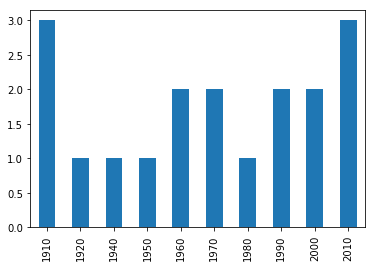

In [106]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### <font color="magenta"> Q16: Plot the number of "Hamlet" _characters_ each decade. <font>  

In [8]:
# Put your code here

## Vectorized String Methods (McKinney p. 212)

pandas makes it easy to munge (i.e. to work with and clean up) strings.  For example, let's say you wanted to find the 10 most frequent roles that start with the word "Science"?  You could use ```str.startswith(...)```:

In [91]:
c = cast
c = c[c.character.str.startswith('Science')]
c.character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Reporter         5
Science Kid              5
Science Promo Cadet      5
Science Club Member      5
Science                  4
Science Fair Teacher     3
Name: character, dtype: int64

### <font color="magenta"> Q17a: What are the 10 most frequent roles that contain the word "Cop"? <font>  

In [9]:
# Put your code here

## Plotting with Two Columns

Let's say we wanted to plot the n-values of Cary Grant’s roles through his career.  We could use a plot like:

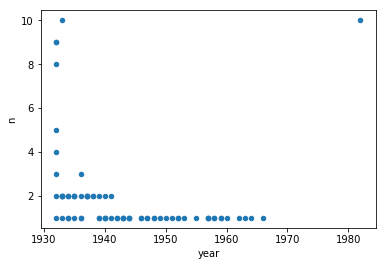

In [118]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year',y='n',kind='scatter')

 ### <font color="magenta"> Q18: What's the outlier of the above plot? (Hint: use sort_values())<font>  

In [10]:
# Put your code here

### <font color="magenta"> Q19: Plot the n-values of Nicolas Cage roles through his career. <font>  

In [11]:
# Put your code here

## Group By Again

The ```//``` operator is useful for "chopping" the last digit off a number.  For example, let's say you wanted to plot the number of films that have been released each decade in the history of cinema:

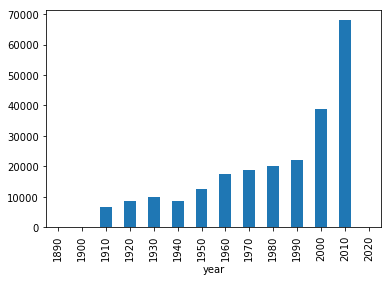

In [119]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [109]:
titles.groupby(titles.year).size()

year
1894        1
1898        1
1899        1
1900        4
1903        1
1905        2
1906        5
1907        4
1908        6
1909       15
1910       22
1911       57
1912      110
1913      249
1914      554
1915      885
1916     1177
1917     1200
1918     1097
1919     1161
1920     1127
1921      974
1922      894
1923      733
1924      802
1925      881
1926      869
1927      871
1928      892
1929      754
        ...  
1997     2312
1998     2388
1999     2504
2000     2739
2001     2842
2002     2973
2003     3121
2004     3454
2005     3950
2006     4212
2007     4354
2008     5033
2009     6035
2010     6273
2011     6869
2012     7274
2013     7692
2014     8080
2015     8677
2016    11059
2017     9232
2018     2362
2019      459
2020      143
2021       29
2022       18
2023       13
2024        3
2025        2
2026        2
Length: 127, dtype: int64

### <font color="magenta"> Q20: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s? <font>  

In [12]:
# Put your code here

### <font color="magenta"> BONUS: Q21: List, in order by year, each of the films in which Frank Oz has played more than 1 role. Hint: ```groupby(...).size()``` returns a Series<font>  

In [13]:
# Put your code here